In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['tmy3-solar', 'suicide-rates-overview-1985-to-2016', 'black-friday']


In [32]:
deep_solar = pd.read_csv("../input/tmy3-solar/TMY3_StationsMeta.csv")
black_friday = pd.read_csv("../input/black-friday/BlackFriday.csv")
suicide_rate=pd.read_csv("../input/suicide-rates-overview-1985-to-2016/master.csv")

Text(0.5, 1.0, 'Elev Given State')

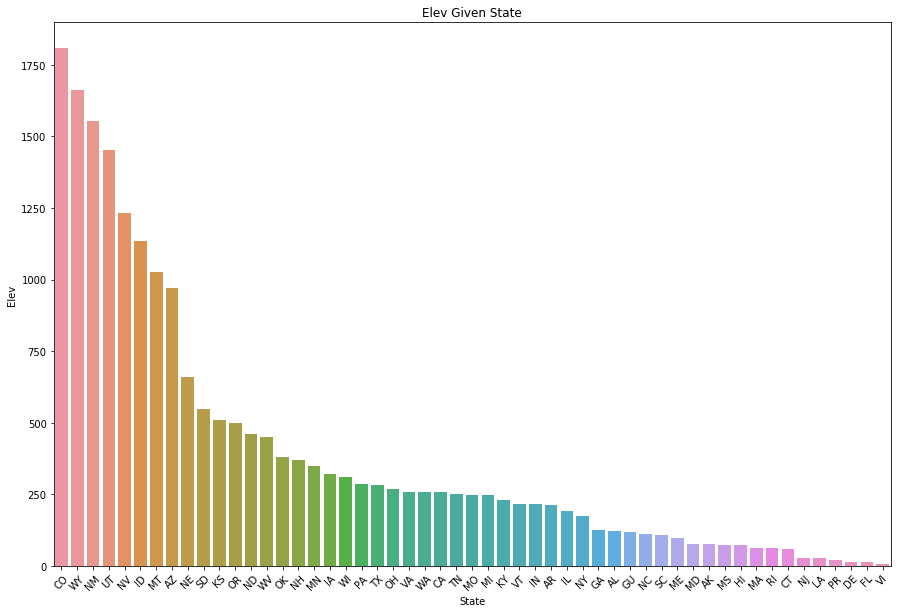

In [33]:
State_list = list(deep_solar['State'].unique())
State_Elev_ratio = []
for i in State_list:
    x = deep_solar[deep_solar['State']==i]
    State_Elev = sum(x.Elev)/len(x)
    State_Elev_ratio.append(State_Elev)
data = pd.DataFrame({'State_list': State_list,'State_Elev_ratio':State_Elev_ratio})
new_index = (data['State_Elev_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data['State_list'], y=sorted_data['State_Elev_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('State')
plt.ylabel('Elev')
plt.title('Elev Given State')

Text(0.5, 1.0, 'Pool Given State')

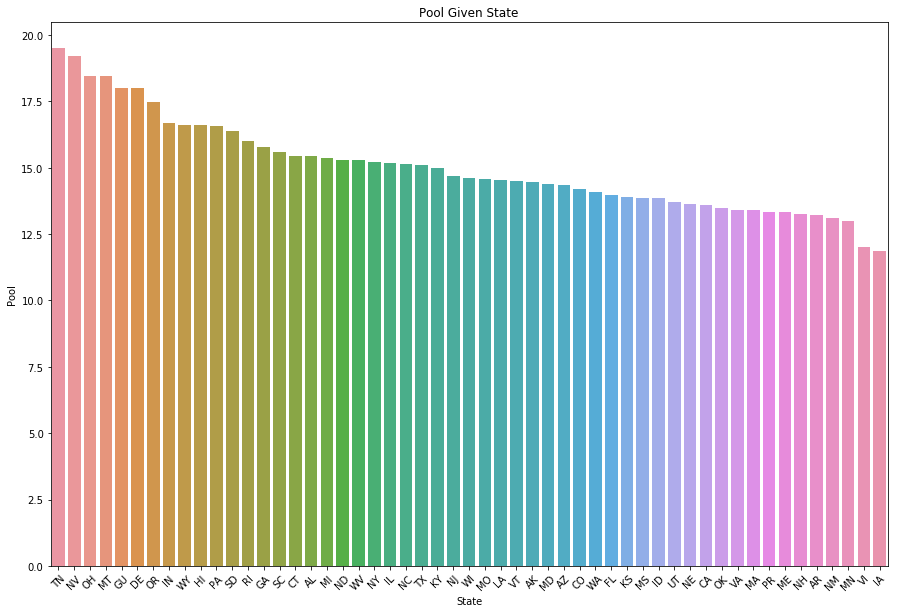

In [34]:
State_list = list(deep_solar['State'].unique())
State_Pool_ratio = []
for i in State_list:
    x = deep_solar[deep_solar['State']==i]
    State_Pool = sum(x.Pool)/len(x)
    State_Pool_ratio.append(State_Pool)
data = pd.DataFrame({'State_list': State_list,'State_Pool_ratio':State_Pool_ratio})
new_index = (data['State_Pool_ratio'].sort_values(ascending=False)).index.values
sorted_data2 = data.reindex(new_index)

# visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2['State_list'], y=sorted_data2['State_Pool_ratio'])
plt.xticks(rotation= 45)
plt.xlabel('State')
plt.ylabel('Pool')
plt.title('Pool Given State')

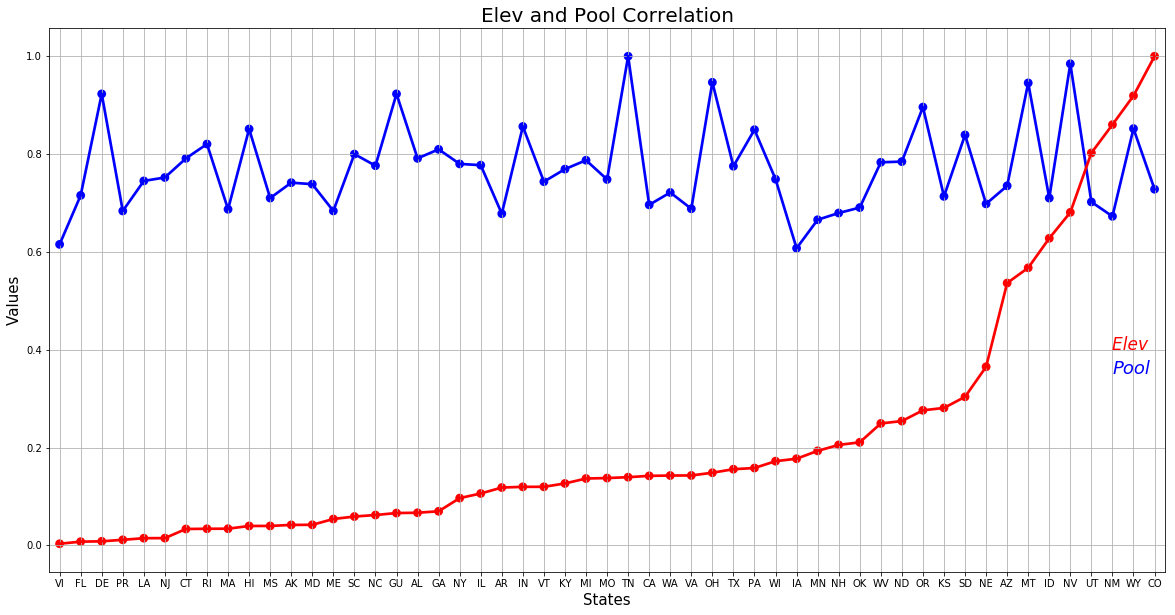

In [36]:
## Point Plot
sorted_data['State_Elev_ratio'] = sorted_data['State_Elev_ratio']/max( sorted_data['State_Elev_ratio'])
sorted_data2['State_Pool_ratio'] = sorted_data2['State_Pool_ratio']/max( sorted_data2['State_Pool_ratio'])
data = pd.concat([sorted_data,sorted_data2['State_Pool_ratio']],axis=1)
data.sort_values('State_Elev_ratio',inplace=True)

# visualize
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='State_list',y='State_Pool_ratio',data=data,color='blue',alpha=0.8)
sns.pointplot(x='State_list',y='State_Elev_ratio',data=data,color='red',alpha=0.8)
plt.text(50,0.4,'Elev ',color='red',fontsize = 17,style = 'italic')
plt.text(50,0.35,'Pool',color='blue',fontsize = 18,style = 'italic')
plt.xlabel('States',fontsize = 15,color='black')
plt.ylabel('Values',fontsize = 15,color='black')
plt.title('Elev and Pool Correlation',fontsize = 20,color='black')
plt.grid()

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


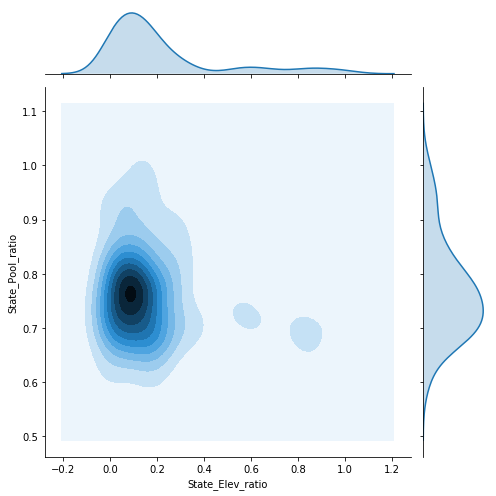

In [37]:
g = sns.jointplot(data.State_Elev_ratio, data.State_Pool_ratio, kind="kde", size=7)
plt.savefig('graph.png')
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


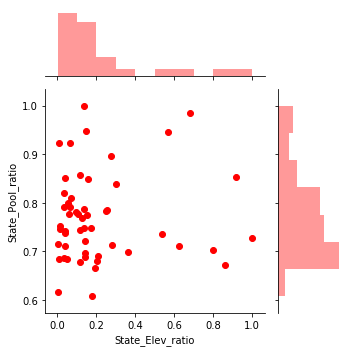

In [38]:
g = sns.jointplot("State_Elev_ratio", "State_Pool_ratio", data=data,size=5, ratio=3, color="r")

Text(0.5, 1.0, 'Solar Class Pie Chart')

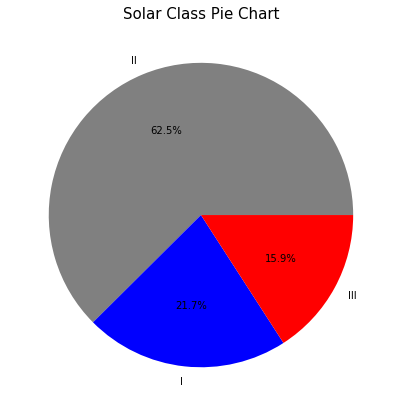

In [40]:
labels = deep_solar.Class.value_counts().index
colors = ['grey','blue','red',]
explode = [0,0,0,]
sizes = deep_solar.Class.value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Solar Class Pie Chart',color = 'Black',fontsize = 15)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


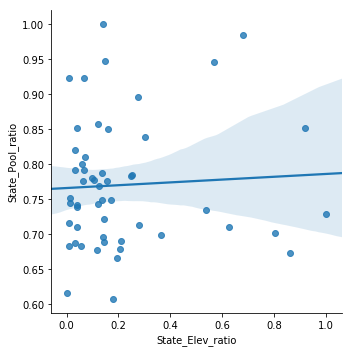

In [41]:
sns.lmplot(x="State_Elev_ratio", y="State_Pool_ratio", data=data)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


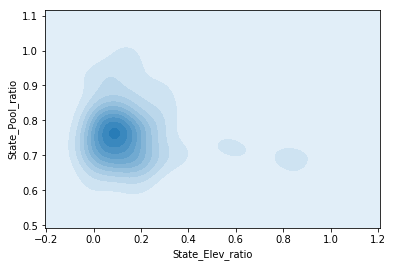

In [42]:
sns.kdeplot(data.State_Elev_ratio, data.State_Pool_ratio, shade=True, cut=3)
plt.show()

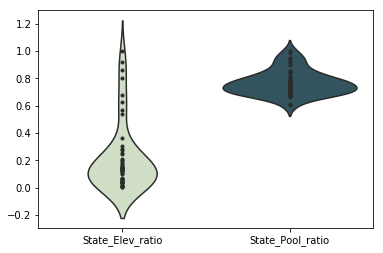

In [43]:
pal = sns.cubehelix_palette(2, rot=-.5, dark=.3)
sns.violinplot(data=data, palette=pal, inner="points")
plt.show()

In [45]:
data.corr()

,State_Elev_ratio,State_Pool_ratio
State_Elev_ratio,1.00000,0.05566
State_Pool_ratio,0.05566,1.00000


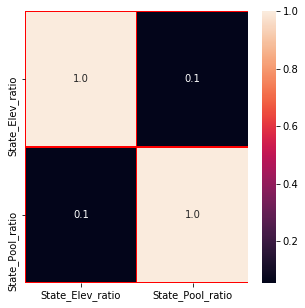

In [44]:
#correlation map
# Visualization of high school graduation rate vs Poverty rate of each state with different style of seaborn code
f,ax = plt.subplots(figsize=(5, 5))
sns.heatmap(data.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

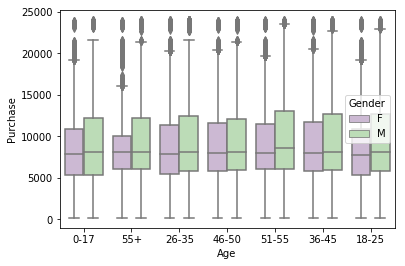

In [46]:

sns.boxplot(x="Age", y="Purchase", hue="Gender", data=black_friday, palette="PRGn")
plt.show()

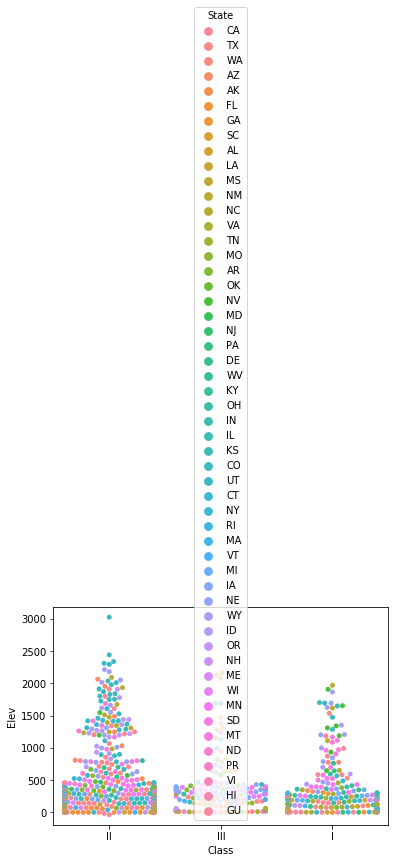

In [47]:
sns.swarmplot(x="Class", y="Elev",hue="State", data=deep_solar)
plt.show()

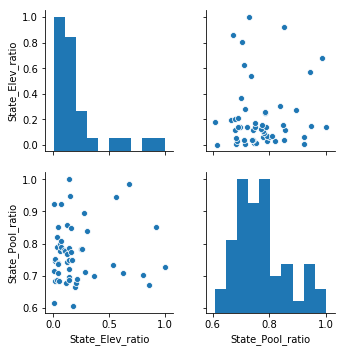

In [48]:
sns.pairplot(data)
plt.show()

Text(0.5, 1.0, 'Class')

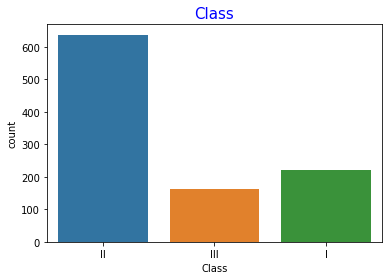

In [49]:
sns.countplot(deep_solar.Class)
#sns.countplot(kill.manner_of_death)
plt.title("Class",color = 'blue',fontsize=15)

In [ ]:
deep_solar.Class.value_counts()